In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import Model, GRB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
data=pd.read_excel("Impact of Discount on customer lifetime.xlsx",skiprows=2,usecols="B:E")# import the excel file 
data.head(5)

,Discount %,High value,Mid Value,Low value
0,0.01,0.0,0.25,0.75
1,0.02,0.0,1.00,1.00
2,0.03,0.2,2.00,2.00
3,0.04,0.5,4.00,3.00
4,0.05,1.0,4.50,4.00


In [5]:
data[['Discount %']]=data[['Discount %']]*100

In [7]:
data.tail(5)

,Discount %,High value,Mid Value,Low value
15,16.0,7.0,11.2,5.8
16,17.0,9.0,11.7,5.9
17,18.0,11.0,11.8,6.0
18,19.0,11.5,11.9,6.2
19,20.0,11.5,12.0,6.3


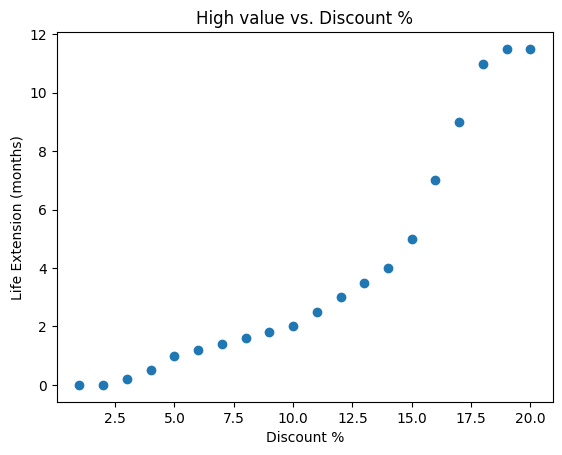

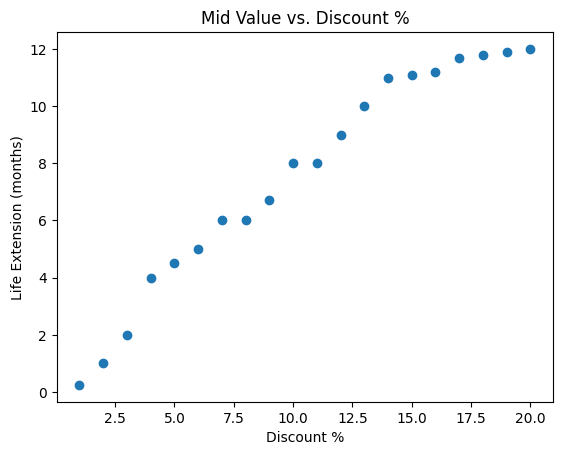

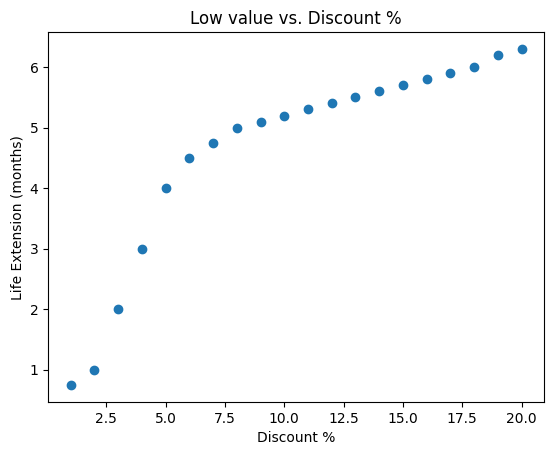

In [9]:
#Print the Scatter plots for the 3 segments.
for i in range(1, 4):
    plt.scatter( data['Discount %'],data[data.columns[i]])
    plt.title(f"{data.columns[i]} vs. Discount %")
    plt.xlabel('Discount %')
    plt.ylabel('Life Extension (months)')
    plt.show()

### Predicting the Lifetime extension for customers

In [23]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import Model, GRB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [99]:
data_transformed = data.copy()
data_transformed['High value Sqrt'] = data['High value'] ** 0.5  # Square the 'High value' column
data_transformed['Low value Cubed'] = data['Low value'] ** 3  # Square root the 'Low value' column
data_transformed=data_transformed.drop(columns=['High value','Low value'])

In [100]:
data_transformed.head()

,Discount %,Mid Value,High value Sqrt,Low value Cubed
0,1.0,0.25,0.000000,0.421875
1,2.0,1.00,0.000000,1.000000
2,3.0,2.00,0.447214,8.000000
3,4.0,4.00,0.707107,27.000000
4,5.0,4.50,1.000000,64.000000


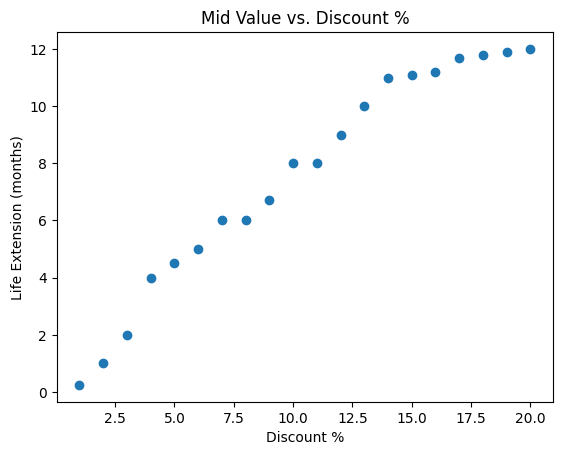

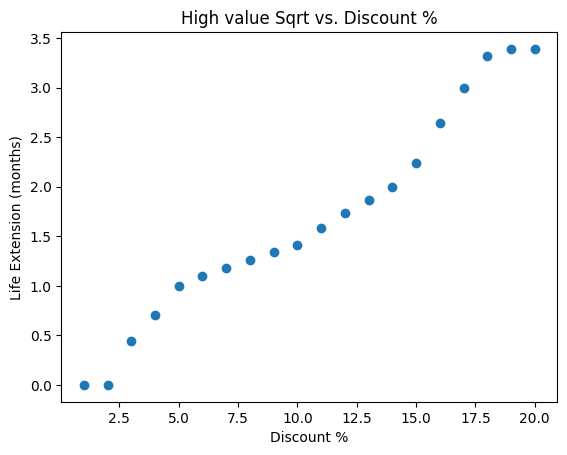

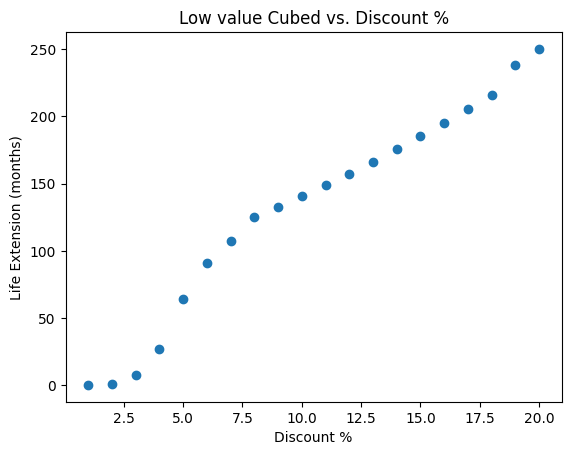

In [101]:
#Print the Scatter plots for the 3 segments.
for i in range(1, 4):
    plt.scatter( data_transformed['Discount %'],data_transformed[data_transformed.columns[i]])
    plt.title(f"{data_transformed.columns[i]} vs. Discount %")
    plt.xlabel('Discount %')
    plt.ylabel('Life Extension (months)')
    plt.show()

In [146]:
data_transformed

,Discount %,Mid Value,High value Sqrt,Low value Cubed,Predicted High Value Sqrt,Predicted Mid Value,Predicted Low Value
0,1.0,0.25,0.000000,0.421875,0.013893,1.513571,8.383321
1,2.0,1.00,0.000000,1.000000,0.189370,2.149774,21.371228
2,3.0,2.00,0.447214,8.000000,0.364847,2.785977,34.359135
3,4.0,4.00,0.707107,27.000000,0.540324,3.422180,47.347042
4,5.0,4.50,1.000000,64.000000,0.715802,4.058383,60.334949
5,6.0,5.00,1.095445,91.125000,0.891279,4.694586,73.322856
6,7.0,6.00,1.183216,107.171875,1.066756,5.330789,86.310763
7,8.0,6.00,1.264911,125.000000,1.242234,5.966992,99.298670
8,9.0,6.70,1.341641,132.651000,1.417711,6.603195,112.286577
9,10.0,8.00,1.414214,140.608000,1.593188,7.239398,125.274484


In [102]:
X = sm.add_constant(data_transformed[['Discount %']])  # If you have other predictors, include them here

# Fit the linear regression model
model_high = sm.OLS(data_transformed['High value Sqrt'], X).fit()  # Use the transformed target variable if intended

# Print the summary of the model
print(model_high.summary())

                            OLS Regression Results                            
Dep. Variable:        High value Sqrt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     517.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.04e-14
Time:                        13:23:30   Log-Likelihood:                 4.9638
No. Observations:                  20   AIC:                            -5.928
Df Residuals:                      18   BIC:                            -3.936
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1616      0.092     -1.748      0.0

In [103]:
X_mid = sm.add_constant(data_transformed[['Discount %']])  # If you have other predictors, include them here

# Fit the linear regression model
model_mid = sm.OLS(data_transformed['Mid Value'], X_mid).fit()  # Use the transformed target variable if intended

# Print the summary of the model
print(model_mid.summary())

                            OLS Regression Results                            
Dep. Variable:              Mid Value   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     399.9
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           9.65e-14
Time:                        13:23:31   Log-Likelihood:                -23.366
No. Observations:                  20   AIC:                             50.73
Df Residuals:                      18   BIC:                             52.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8774      0.381      2.302      0.0

In [104]:
X_low = sm.add_constant(data_transformed[['Discount %']])  # If you have other predictors, include them here

# Fit the linear regression model
model_low = sm.OLS(data_transformed['Low value Cubed'], X_low).fit()  # Use the transformed target variable if intended

# Print the summary of the model
print(model_low.summary())

                            OLS Regression Results                            
Dep. Variable:        Low value Cubed   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     475.8
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           2.14e-14
Time:                        13:23:32   Log-Likelihood:                -81.953
No. Observations:                  20   AIC:                             167.9
Df Residuals:                      18   BIC:                             169.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6046      7.133     -0.646      0.5

In [105]:
predicted_values_high = model_high.predict(X)

# If you want to add these predicted values back into your DataFrame for comparison
data_transformed['Predicted High Value Sqrt'] = predicted_values_high
print(data_transformed[['High value Sqrt', 'Predicted High Value Sqrt']])

    High value Sqrt  Predicted High Value Sqrt
0          0.000000                   0.013893
1          0.000000                   0.189370
2          0.447214                   0.364847
3          0.707107                   0.540324
4          1.000000                   0.715802
5          1.095445                   0.891279
6          1.183216                   1.066756
7          1.264911                   1.242234
8          1.341641                   1.417711
9          1.414214                   1.593188
10         1.581139                   1.768666
11         1.732051                   1.944143
12         1.870829                   2.119620
13         2.000000                   2.295098
14         2.236068                   2.470575
15         2.645751                   2.646052
16         3.000000                   2.821529
17         3.316625                   2.997007
18         3.391165                   3.172484
19         3.391165                   3.347961


In [106]:
predicted_values_mid = model_mid.predict(X_mid)

# If you want to add these predicted values back into your DataFrame for comparison
data_transformed['Predicted Mid Value'] = predicted_values_mid
print(data_transformed[['Mid Value', 'Predicted Mid Value']])

    Mid Value  Predicted Mid Value
0        0.25             1.513571
1        1.00             2.149774
2        2.00             2.785977
3        4.00             3.422180
4        4.50             4.058383
5        5.00             4.694586
6        6.00             5.330789
7        6.00             5.966992
8        6.70             6.603195
9        8.00             7.239398
10       8.00             7.875602
11       9.00             8.511805
12      10.00             9.148008
13      11.00             9.784211
14      11.10            10.420414
15      11.20            11.056617
16      11.70            11.692820
17      11.80            12.329023
18      11.90            12.965226
19      12.00            13.601429


In [107]:
predicted_values_low = model_low.predict(X_low)

# If you want to add these predicted values back into your DataFrame for comparison
data_transformed['Predicted Low Value'] = predicted_values_low
print(data_transformed[['Low value Cubed', 'Predicted Low Value']])

    Low value Cubed  Predicted Low Value
0          0.421875             8.383321
1          1.000000            21.371228
2          8.000000            34.359135
3         27.000000            47.347042
4         64.000000            60.334949
5         91.125000            73.322856
6        107.171875            86.310763
7        125.000000            99.298670
8        132.651000           112.286577
9        140.608000           125.274484
10       148.877000           138.262391
11       157.464000           151.250298
12       166.375000           164.238205
13       175.616000           177.226112
14       185.193000           190.214019
15       195.112000           203.201926
16       205.379000           216.189833
17       216.000000           229.177740
18       238.328000           242.165647
19       250.047000           255.153554


In [147]:
predicted_extensions_high=data_transformed["Predicted High Value Sqrt"].tolist()
predicted_extensions_mid=data_transformed["Predicted Mid Value"].tolist()
predicted_extensions_low=data_transformed["Predicted Low Value"].tolist()

print(predicted_extensions_high)
print(predicted_extensions_mid)
print(predicted_extensions_low)

[0.013892523938868445, 0.18936983328394635, 0.3648471426290243, 0.5403244519741022, 0.71580176131918, 0.891279070664258, 1.0667563800093363, 1.2422336893544137, 1.4177109986994916, 1.5931883080445695, 1.7686656173896473, 1.9441429267347257, 2.1196202360798035, 2.295097545424882, 2.4705748547699593, 2.646052164115037, 2.821529473460115, 2.997006782805193, 3.172484092150271, 3.3479614014953487]
[1.5135714285714303, 2.149774436090227, 2.785977443609024, 3.4221804511278204, 4.058383458646618, 4.694586466165414, 5.330789473684211, 5.9669924812030075, 6.603195488721804, 7.239398496240601, 7.875601503759398, 8.511804511278195, 9.148007518796991, 9.784210526315789, 10.420413533834585, 11.056616541353382, 11.692819548872178, 12.329022556390974, 12.965225563909772, 13.601428571428569]
[8.383321428571476, 21.37122838345869, 34.3591353383459, 47.347042293233116, 60.33494924812033, 73.32285620300755, 86.31076315789477, 99.29867011278196, 112.28657706766919, 125.27448402255641, 138.26239097744363, 1

### Optimizing without reversing the transformations

In [109]:
# Define your customer segments, discount levels, average revenues, original lifetimes, and segment sizes
segments = ['High', 'Medium', 'Low']
discount_levels = list(range(1, 21))  # 1% to 20% discounts
AR = {'High': 60, 'Medium': 50, 'Low': 40}  # Average monthly revenue
LT = {'High': 14, 'Medium': 12, 'Low': 6}  # Original lifetime in months
segment_customers = {'High': 40000, 'Medium': 25000, 'Low': 10000}  # Customers in each segment
#intercepts = {'High': model_high.intercept_, 'Medium': model_mid.intercept_, 'Low': model_low.intercept_}

# Convert lists to dictionaries
predicted_extensions = {
    'High': {discount_levels[i]: predicted_extensions_high[i] for i in range(len(discount_levels))},
    'Medium': {discount_levels[i]: predicted_extensions_mid[i] for i in range(len(discount_levels))},
    'Low': {discount_levels[i]: predicted_extensions_low[i] for i in range(len(discount_levels))}
}


In [110]:
# Initialize the model
m = Model("RevenueMaximization")

# Decision Variables: number of customers in each segment offered each discount level
x = m.addVars(segments, discount_levels, vtype=GRB.INTEGER, name="x")

# Objective Function: Maximize total revenue considering average revenue, original lifetime, and predicted extensions
m.setObjective(sum(x[s, d] * AR[s] * (LT[s] + predicted_extensions[s][d]) for s in segments for d in discount_levels), GRB.MAXIMIZE)



In [111]:
# Constraints

# 1. Limit discounts to no more than 20% of the total customer base
total_customers = sum(segment_customers.values())
m.addConstr(sum(x[s, d] for s in segments for d in discount_levels) <= 0.20 * total_customers, "DiscountLimitation")

# 2. Ensure the total customers in each segment receiving discounts does not exceed the segment size
for s in segments:
    m.addConstr(sum(x[s, d] for d in discount_levels) <= segment_customers[s], f"CustomerLimit_{s}")



In [112]:
# Solve the model
m.optimize()



Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22621.2))

CPU model: 12th Gen Intel(R) Core(TM) i9-12900H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 4 rows, 60 columns and 120 nonzeros
Model fingerprint: 0x0db592bf
Variable types: 0 continuous, 60 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+02, 1e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 4e+04]
Found heuristic solution: objective 1.260000e+07
Presolve removed 4 rows and 60 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 20 available processors)

Solution count 2: 1.08419e+08 1.26e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.084188000000e+08, best bound 1.084188000000e+08, gap 0.0000%


In [113]:
# Extract and print the solution
if m.status == GRB.OPTIMAL:
    solution = m.getAttr('X', x)
    for s in segments:
        for d in discount_levels:
            if solution[s, d] > 0:
                print(f"Segment: {s}, Discount {d}%, Customers: {solution[s, d]}")
else:
    print("Optimal solution was not found.")

Segment: Medium, Discount 20%, Customers: 5000.0
Segment: Low, Discount 20%, Customers: 10000.0


### Reversing the transformations 

In [122]:
data_transformed_back=data_transformed.copy()

In [148]:
data_transformed_back['High value org'] = data_transformed['Predicted High Value Sqrt'] ** 2  # Square the 'High value' column
data_transformed_back['Low value org'] = data_transformed['Predicted Low Value'] ** (1/3)  # Cube root the 'Low value' column


In [149]:
data_transformed_back

,Discount %,Mid Value,Predicted High Value Sqrt,Predicted Mid Value,Predicted Low Value,High value org,Low value org
0,1.0,0.25,0.013893,1.513571,8.383321,0.000193,2.031446
1,2.0,1.00,0.189370,2.149774,21.371228,0.035861,2.775086
2,3.0,2.00,0.364847,2.785977,34.359135,0.133113,3.250978
3,4.0,4.00,0.540324,3.422180,47.347042,0.291951,3.617687
4,5.0,4.50,0.715802,4.058383,60.334949,0.512372,3.922139
5,6.0,5.00,0.891279,4.694586,73.322856,0.794378,4.185491
6,7.0,6.00,1.066756,5.330789,86.310763,1.137969,4.419315
7,8.0,6.00,1.242234,5.966992,99.298670,1.543145,4.630712
8,9.0,6.70,1.417711,6.603195,112.286577,2.009904,4.824392
9,10.0,8.00,1.593188,7.239398,125.274484,2.538249,5.003657


In [150]:
predicted_extensions_high_back=data_transformed_back["High value org"].tolist()
predicted_extensions_mid_back=data_transformed_back["Predicted Mid Value"].tolist()
predicted_extensions_low_back=data_transformed_back["Low value org"].tolist()

print(predicted_extensions_high_back)
print(predicted_extensions_mid_back)
print(predicted_extensions_low_back)

[0.0001930022213920328, 0.035860933757989634, 0.13311343748456358, 0.29195051340111383, 0.5123721615076404, 0.7943783818041434, 1.1379691742906235, 1.543144538967078, 2.0099044758335096, 2.538248984889918, 3.1281780661363023, 3.7796917195726647, 4.492789945199002, 5.267472743015317, 6.103740113021606, 7.001592055217872, 7.961028569604114, 8.982049656180333, 10.064655314946528, 11.2088455459027]
[1.5135714285714303, 2.149774436090227, 2.785977443609024, 3.4221804511278204, 4.058383458646618, 4.694586466165414, 5.330789473684211, 5.9669924812030075, 6.603195488721804, 7.239398496240601, 7.875601503759398, 8.511804511278195, 9.148007518796991, 9.784210526315789, 10.420413533834585, 11.056616541353382, 11.692819548872178, 12.329022556390974, 12.965225563909772, 13.601428571428569]
[2.031446422256379, 2.775086311021949, 3.250978335472713, 3.6176866851115843, 3.92213902695063, 4.185491439495532, 4.419315277146351, 4.630712417415913, 4.824392285745988, 5.003657111422468, 5.170922407085097, 5.

In [151]:
# Define your customer segments, discount levels, average revenues, original lifetimes, and segment sizes
segments = ['High', 'Medium', 'Low']
discount_levels = list(range(1, 21))  # 1% to 20% discounts
AR = {'High': 60, 'Medium': 50, 'Low': 40}  # Average monthly revenue
LT = {'High': 14, 'Medium': 12, 'Low': 6}  # Original lifetime in months
segment_customers = {'High': 40000, 'Medium': 25000, 'Low': 10000}  # Customers in each segment
#intercepts = {'High': model_high.intercept_, 'Medium': model_mid.intercept_, 'Low': model_low.intercept_}

# Convert lists to dictionaries
predicted_extensions = {
    'High': {discount_levels[i]: predicted_extensions_high_back[i] for i in range(len(discount_levels))},
    'Medium': {discount_levels[i]: predicted_extensions_mid_back[i] for i in range(len(discount_levels))},
    'Low': {discount_levels[i]: predicted_extensions_low_back[i] for i in range(len(discount_levels))}
}


In [152]:
# Initialize the model
m = Model("RevenueMaximization")

# Decision Variables: number of customers in each segment offered each discount level
x = m.addVars(segments, discount_levels, vtype=GRB.INTEGER, name="x")

# Objective Function: Maximize total revenue considering average revenue, original lifetime, and predicted extensions
m.setObjective(sum(x[s, d] * (AR[s]*(1-(d/100))) * (LT[s] + predicted_extensions[s][d]) for s in segments for d in discount_levels), GRB.MAXIMIZE)



In [153]:
# Constraints

# 1. Limit discounts to no more than 20% of the total customer base
total_customers = sum(segment_customers.values())
m.addConstr(sum(x[s, d] for s in segments for d in discount_levels) <= 0.20 * total_customers, "RevenueMaximization")

# 2. Ensure the total customers in each segment receiving discounts does not exceed the segment size
for s in segments:
    m.addConstr(sum(x[s, d] for d in discount_levels) <= segment_customers[s], f"CustomerLimit_{s}")



In [154]:
# Solve the model
m.optimize()


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22621.2))

CPU model: 12th Gen Intel(R) Core(TM) i9-12900H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 4 rows, 60 columns and 120 nonzeros
Model fingerprint: 0x700caa0e
Variable types: 0 continuous, 60 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+02, 1e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 4e+04]
Found heuristic solution: objective 1.247417e+07
Presolve removed 4 rows and 60 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 20 available processors)

Solution count 2: 1.81504e+07 1.24742e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.815036879305e+07, best bound 1.815036879305e+07, gap 0.0000%


In [155]:
# Extract and print the solution
if m.status == GRB.OPTIMAL:
    solution = m.getAttr('X', x)
    for s in segments:
        for d in discount_levels:
            if solution[s, d] > 0:
                print(f"Segment: {s}, Discount {d}%, Customers: {solution[s, d]}")
else:
    print("Optimal solution was not found.")

Segment: High, Discount 20%, Customers: 15000.0
